In [2]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
customer_dataset = pd.read_csv("Mall_Customers.csv")
customer_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

GROUP OF CUSTOMERS BASED ON THE ANNUAL INCOME AND SPENDING SCORE 

In [5]:
X = customer_dataset.iloc[ : , [3,4]].values

In [6]:
X[ 0 : 5 , 0][3]     #This is just a way to getting the number or digit from the numpy

np.int64(16)

In [7]:
k_range = range(1,10)
sse = []
for k in k_range:
    kms = KMeans(n_clusters=k)
    kms.fit(X)
    sse.append(kms.inertia_)

Text(0, 0.5, 'Sum squred values')

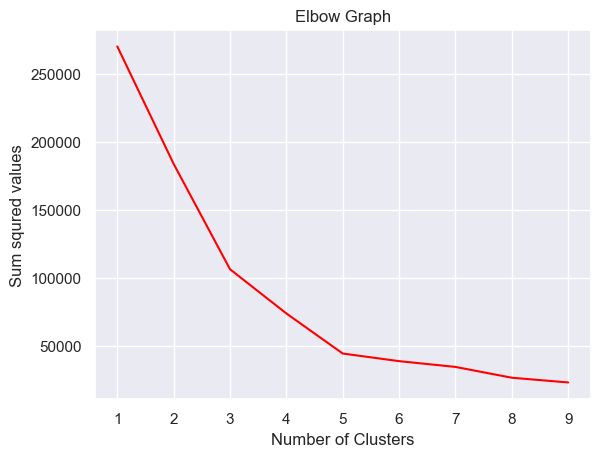

In [8]:
sns.set()
plt.plot(k_range , sse , color = "red")
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum squred values")

NOW WE FOUND CLUSTER IS 5

In [9]:
kms = KMeans(n_clusters=5)
y_predict = kms.fit_predict(X)
customer_dataset["cluster"] = y_predict

In [10]:
customer_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [11]:
customer_dataset[customer_dataset["cluster"].values == 1].head()  #For getting cluster value of 1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
124,125,Female,23,70,29,1
128,129,Male,59,71,11,1
130,131,Male,47,71,9,1
132,133,Female,25,72,34,1
134,135,Male,20,73,5,1


In [12]:
#Lets plot a graph for that 
df1 = customer_dataset[customer_dataset["cluster"].values == 0]
df2 = customer_dataset[customer_dataset["cluster"].values == 1]
df3 = customer_dataset[customer_dataset["cluster"].values == 2]
df4 = customer_dataset[customer_dataset["cluster"].values == 3]
df5 = customer_dataset[customer_dataset["cluster"].values == 4]

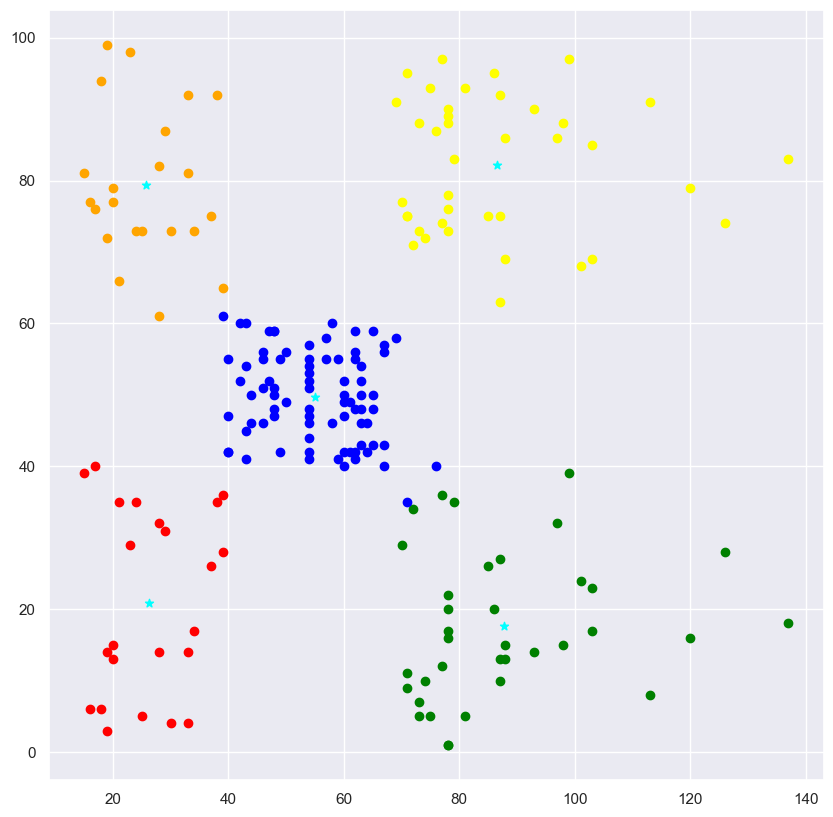

In [14]:
sns.set()
plt.figure(figsize=(10,10))
plt.scatter(df1["Annual Income (k$)"] , df1["Spending Score (1-100)"] , color = "red")
plt.scatter(df2["Annual Income (k$)"] , df2["Spending Score (1-100)"] , color = "green")
plt.scatter(df3["Annual Income (k$)"] , df3["Spending Score (1-100)"] , color = "blue")
plt.scatter(df4["Annual Income (k$)"] , df4["Spending Score (1-100)"] , color = "yellow")
plt.scatter(df5["Annual Income (k$)"] , df5["Spending Score (1-100)"] , color = "orange")
plt.scatter(kms.cluster_centers_[: , 0] , kms.cluster_centers_[ : , 1] , marker = "*" , color = "cyan")

In [30]:
customer_dataset[customer_dataset["cluster"] == 0].iloc[: , 1]

0       Male
2     Female
4     Female
6     Female
8       Male
10      Male
12    Female
14      Male
16    Female
18      Male
20      Male
22    Female
24    Female
26    Female
28    Female
30      Male
32      Male
34    Female
36    Female
38    Female
40    Female
42      Male
44    Female
Name: Gender, dtype: object